In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
main_copy_dir = os.path.join(parent_dir, "main_copy")
octagon_analysis = os.path.join(parent_dir, "octagon_analysis")
sys.path.append(main_copy_dir)
sys.path.append(octagon_analysis)

print("Added paths to sys.path:", main_copy_dir, octagon_analysis)

Added paths to sys.path: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis


In [8]:
#imports
%load_ext autoreload
%autoreload 2
import scipy
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
from parse_data import preprocess
import matplotlib as mpl
import matplotlib.pyplot as plt
import globals
import plotting.plot_trajectory as plot_trajectory
import plotting.plot_octagon as plot_octagon
import data_extraction.extract_trial as extract_trial
import data_extraction.trial_list_filters as trial_list_filters
import math
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
from IPython.display import Image, display
import data_extraction.get_indices as get_indices
import prominent_direction_functions as prominent_direction_functions
import flip_rotate_headangle_functions
import headangle_analysis_plotting_functions
import headangle_bin_assignment_new
import analysis.wall_visibility_and_choice as wall_visibility_and_choice
import calculate_probabilities_functions
import filtering_functions
import plot_headangle_vectors_colour_map
import fast_track_flip_and_rotate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis'

json_filenames_all_solo = [r'Json_data/2025-01-15_15-12-39_MarcoFirstSolo.json',
                                r'Json_data/2024-12-19_15-51-33_YeungSecondSolo.json',
                                r'Json_data/2024-11-12_15-44-54_FrancescaSecondSolo.json',
                                r'Json_data/2024-11-12_15-11-45_SenFirstSolo.json',
                                r'Json_data/2024-11-20_15-39-49_VinceSecondSolo.json',
                                r'Json_data/2024-11-19_14-18-18_AmyFirstSolo.json',
                                r'Json_data/2024-11-12_15-45-35_SenSecondSolo.json',
                                r'Json_data/2024-11-12_13-50-23_KhadijaSecondSolo.json',
                                r'Json_data/2024-11-13_15-21-50_HoiFirstSolo.json',
                                r'Json_data/2024-09-13_11-23-37_YansuFirstSolo.json',
                                r'Json_data/2024-11-13_15-22-20_YichuanFirstSolo.json',
                                r'Json_data/2024-11-20_15-10-17_VinceFirstSolo.json',
                                r'Json_data/2025-01-15_16-14-40_YuChunFirstSolo.json',
                                r'Json_data/2024-11-12_13-18-59_WendyFirstSolo.json',
                                r'Json_data/2024-10-17_14-51-22_AbigailSecondSolo.json',
                                r'Json_data/2024-09-13_11-53-56_JerrySecondSolo.json',
                                r'Json_data/2024-09-27_14-14-42_EmilyFirstSolo.json',
                                r'Json_data/2025-01-15_16-50-13_YuChunSecondSolo.json',
                                r'Json_data/2024-11-12_13-50-20_WendySecondSolo.json',
                                r'Json_data/2025-01-15_15-46-04_MarcoSecondSolo.json',
                                r'Json_data/2024-10-17_14-20-50_AbigailFirstSolo.json',
                                r'Json_data/2024-11-13_15-51-39_YichuanSecondSolo.json',
                                r'Json_data/2024-11-20_14-41-56_RahulSecondSolo.json',
                                r'Json_data/2024-10-17_14-20-28_ShamirFirstSolo.json',
                                r'Json_data/2025-01-15_15-47-11_YixuanSecondSolo.json',
                                r'Json_data/2024-11-19_15-15-53_SophiaFirstSolo.json',
                                r'Json_data/2025-01-15_16-50-37_RuiqingSecondSolo.json',
                                r'Json_data/2024-11-20_15-40-08_SunnySecondSolo.json',
                                r'Json_data/2024-09-27_14-14-31_SaraFirstSolo.json',
                                r'Json_data/2024-09-27_14-45-46_EmilySecondSolo.json',
                                r'Json_data/2024-11-12_13-19-22_KhadijaFirstSolo.json',
                                r'Json_data/2024-11-12_15-13-34_FrancescaFirstSolo.json',
                                r'Json_data/2024-11-19_15-47-53_SophiaSecondSolo.json',
                                r'Json_data/2024-11-20_14-12-33_RahulFirstSolo.json',
                                r'Json_data/2024-10-17_14-50-03_ShamirSecondSolo.json',
                                r'Json_data/2024-09-13_11-53-34_YansuSecondSolo.json',
                                r'Json_data/2024-10-17_17-12-29_ElsaSecondSolo.json',
                                r'Json_data/2024-12-19_15-22-13_YeungFirstSolo.json',
                                r'Json_data/2024-12-19_15-51-58_JingjingSecondSolo.json',
                                r'Json_data/2024-11-13_15-51-16_HoiSecondSolo.json',
                                r'Json_data/2024-11-19_14-18-44_XinyuanFirstSolo.json',
                                r'Json_data/2024-10-17_16-35-45_ElsaFirstSolo.json',
                                r'Json_data/2024-11-20_15-10-00_SunnyFirstSolo.json',
                                r'Json_data/2024-11-19_14-44-31_XinyuanSecondSolo.json',
                                r'Json_data/2024-11-20_14-12-06_JasonFirstSolo.json',
                                r'Json_data/2024-10-17_16-36-0_ZimoFirstSolo.json',
                                r'Json_data/2024-09-27_14-45-55_SaraSecondSolo.json',
                                r'Json_data/2024-10-17_17-11-46_ZimoSecondSolo.json',
                                r'Json_data/2025-01-15_16-14-58_RuiqingFirstSolo.json',
                                r'Json_data/2024-11-19_15-14-19_HocineFirstSolo.json',
                                r'Json_data/2024-11-20_14-42-16_JasonSecondSolo.json',
                                r'Json_data/2024-12-19_15-20-18_JingjingFirstSolo.json',
                                r'Json_data/2024-09-13_11-23-50_JerryFirstSolo.json',
                                r'Json_data/2025-01-15_15-12-13_YixuanFirstSolo.json',
                                r'Json_data/2024-11-19_15-47-29_HocineSecondSolo.json',
                                r'Json_data/2024-11-19_14-44-00_AmySecondSolo.json',
                                r'Json_data/2024-12-03_14-20-13_PaulFirstSolo.json',
                                r'Json_data/2024-12-03_14-52-05_PaulSecondSolo.json',
                                r'Json_data/2024-12-03_14-19-21_NicoleFirstSolo.json',
                                r'Json_data/2024-12-03_14-52-30_NicoleSecondSolo.json',
                                r'Json_data/2024-12-03_15-19-51_EstherFirstSolo.json',
                                r'Json_data/2024-12-03_15-53-11_EstherSecondSolo.json',
                                r'Json_data/2024-12-03_15-20-09_BowinFirstSolo.json',
                                r'Json_data/2024-12-03_15-52-57_BowinSecondSolo.json',
                                r'Json_data/2024-12-10_14-13-47_TaqwaFirstSolo.json',
                                r'Json_data/2024-12-10_14-45-41_TaqwaSecondSolo.json',
                                r'Json_data/2024-12-10_14-12-58_TasFirstSolo.json',
                                r'Json_data/2024-12-10_14-45-09_TasSecondSolo.json',
                                r'Json_data/2024-12-10_15-12-18_RyanFirstSolo.json',
                                r'Json_data/2024-12-10_15-42-27_RyanSecondSolo.json',
                                r'Json_data/2024-12-10_15-11-46_RoseFirstSolo.json',
                                r'Json_data/2024-12-10_15-41-53_RoseSecondSolo.json',
                                r'Json_data/2024-11-13_14-12-41_RyanFirstSolo.json',
                                r'Json_data/2024-11-13_14-37-20_RyanSecondSolo.json',
                                r'Json_data/2024-11-13_14-12-43_NasiaFirstSolo.json',
                                r'Json_data/2024-11-13_14-37-06_NasiaSecondSolo.json']

#r'Json_data/2024-12-20_17-36-27_KirtanFirstSolo.json' 
#r'Json_data/2024-12-20_18-06-10_KirtanSecondSolo.json
#r'Json_data/2024-12-20_17-36-54_ChristopherFirstSolo.json'
#r'Json_data/2024-12-20_18-06-44_ChristopherSecondSolo.json'
                          


 

In [5]:
import glob
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/benny_dev'
json_filenames_all_social = glob.glob(r'json_social/*.json')
json_filenames_all_solo = glob.glob(r'json_solos/*.json')

In [6]:

json_filenames = json_filenames_all_solo
df, trial_lists = prepare_data.prepare_data(data_folder, json_filenames, combine=False)
print(len(trial_lists))
trial_lists = [trial_lists[i] + trial_lists[i+1] for i in range(0, len(trial_lists), 2)]


filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/benny_dev/json_solos/2024-12-20_17-36-54_ChristopherFirstSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/benny_dev/json_solos/2025-01-15_15-12-39_MarcoFirstSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/benny_dev/json_solos/2024-12-19_15-51-33_YeungSecondSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/benny_dev/json_solos/2024-11-12_15-44-54_FrancescaSecondSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/benny_dev/json_solos/2024-11-13_14-37-20_RyanSecondSolo.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/benny_dev/json_solos/2024-11-12_15-11-45_SenFirstSolo.json
Loading complete.
Preprocessing comp

In [7]:
updated_lists_solo=[]
for trial_list in range(len(trial_lists)):
    updated_list = flip_rotate_headangle_functions.process_and_update_trials(trial_lists[trial_list], 0)
    updated_lists_solo.append(updated_list)

KeyboardInterrupt: 

In [9]:
updated_lists_solo=[]
for trial_list in range(len(trial_lists)):
    updated_list = fast_track_flip_and_rotate.process_and_update_trials_both_players_fast(trial_lists[trial_list])
    updated_lists_solo.append(updated_list)

Computing nominator, denominator and probabilities for plots for:
45°,90°,180°
1) LW visible first
2) HW visible first
3) both walls visible at slice onset

In [80]:
fov=110 #set
wall_index=0 #for p(high)
player_id=0

#change
wall_visible_index=1
wall_sep=None
both=False #set to true for both walls visible at slice onset

updated=True #needed for head angle bins
inferred_choice=False #for solos


In [81]:


def apply_filters(trial_list, updated_list, wall_sep):
    """Apply filtering steps while keeping both lists aligned."""
    trial_indices = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
    trial_list = [trial_list[i] for i in trial_indices]
    updated_list = [updated_list[i] for i in trial_indices]  # Ensure alignment

    if wall_sep is not None:
        trial_indices = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=wall_sep)
        trial_list = [trial_list[i] for i in trial_indices]
        updated_list = [updated_list[i] for i in trial_indices]  # Keep them aligned!

    return trial_list, updated_list

In [82]:
filtered_trials_nominator = {}
updated_trials_nominator = {}

for session_id, (trial_list, updated_list) in enumerate(zip(trial_lists, updated_lists_solo)):
    trial_list, updated_list = apply_filters(trial_list, updated_list, wall_sep)

    # Initialize dictionaries properly
    filtered_trials_nominator[session_id] = {'by_player': {}}
    updated_trials_nominator[session_id] = {'by_player': {}}

    print(f"Session: {session_id}, Player: {player_id}, Trial List Length: {len(trial_list)}, Updated List Length: {len(updated_list)}")

    trial_list_filtered, updated_list_filtered, _ = filtering_functions.headangle_bins_analyses_nominator(
            trial_list, updated_list, player_id, inferred_choice, fov, wall_visible_index, wall_index, both=both, head_angle_bin=None, updated=updated
        )

    filtered_trials_nominator[session_id]['by_player'][player_id] = trial_list_filtered
    updated_trials_nominator[session_id]['by_player'][player_id] = updated_list_filtered

    print(f"Completed: Session {session_id}")


Session: 0, Player: 0, Trial List Length: 64, Updated List Length: 64
64
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.]
And the number of valid trials at this step is 28
[ 0  5  6  7 11 14 15 16 19 21 23 25 26 29 30 31 34 37 42 49 50 53 54 55
 58 60 62 63]
Completed: Session 0
Session: 1, Player: 0, Trial List Length: 81, Updated List Length: 81
81
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0.]
And the number of valid trials at this step is 20
[22 32 40 41 44 45 47 49 50 

In [83]:
filtered_trials_denominator = {}
updated_trials_denominator = {}

for session_id, (trial_list, updated_list) in enumerate(zip(trial_lists, updated_lists_solo)):
    trial_list, updated_list = apply_filters(trial_list, updated_list, wall_sep)

    # Initialize dictionaries properly
    filtered_trials_denominator[session_id] = {'by_player': {}}
    updated_trials_denominator[session_id] = {'by_player': {}}

    print(f"Session: {session_id}, Player: {player_id}, Trial List Length: {len(trial_list)}, Updated List Length: {len(updated_list)}")

    trial_list_filtered, updated_list_filtered, _ = filtering_functions.headangle_bins_analyses_denominator(
            trial_list, updated_list, player_id, inferred_choice, fov, wall_visible_index, both=both, head_angle_bin=None, updated=updated
        )
    
    filtered_trials_denominator[session_id]['by_player'][player_id] = trial_list_filtered
    updated_trials_denominator[session_id]['by_player'][player_id] = updated_list_filtered

    print(f"Completed: Session {session_id}")


Session: 0, Player: 0, Trial List Length: 64, Updated List Length: 64
64
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.]
And the number of valid trials at this step is 28
[ 0  5  6  7 11 14 15 16 19 21 23 25 26 29 30 31 34 37 42 49 50 53 54 55
 58 60 62 63]
Completed: Session 0
Session: 1, Player: 0, Trial List Length: 81, Updated List Length: 81
81
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0.]
And the number of valid trials at this step is 20
[22 32 40 41 44 45 47 49 50 

In [84]:
from collections import defaultdict

total_counts_trials = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'by_bin': {'total_counts': 0}}))))
true_counts_trials = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'by_bin': {'true_counts': 0}}))))

# loop over the filtered trials
for session_id in filtered_trials_nominator:
    
    for bin_id in range(1,9):

        total_count = 0
        true_count = 0

        player_ids = [0]
    
        for player_id in player_ids:
            trial_list_filtered_true = filtered_trials_nominator[session_id]['by_player'][player_id][bin_id]
            trial_list_filtered = filtered_trials_denominator[session_id]['by_player'][player_id][bin_id]

            total_count += len(trial_list_filtered)
            true_count += len(trial_list_filtered_true)
            

        # store the final counts for total and true trials
        total_counts_trials[session_id]['by_bin'][bin_id]['total_counts'] = total_count
        true_counts_trials[session_id]['by_bin'][bin_id]['true_counts'] = true_count

        # debug Output
        print(f"Session {session_id}, Bin {bin_id}:")
        print(f"   ➤ Total Trials = {total_count}")
        print(f"   ➤ True Trials = {true_count}")           

Session 0, Bin 1:
   ➤ Total Trials = 0
   ➤ True Trials = 0
Session 0, Bin 2:
   ➤ Total Trials = 0
   ➤ True Trials = 0
Session 0, Bin 3:
   ➤ Total Trials = 8
   ➤ True Trials = 3
Session 0, Bin 4:
   ➤ Total Trials = 2
   ➤ True Trials = 1
Session 0, Bin 5:
   ➤ Total Trials = 9
   ➤ True Trials = 5
Session 0, Bin 6:
   ➤ Total Trials = 5
   ➤ True Trials = 3
Session 0, Bin 7:
   ➤ Total Trials = 4
   ➤ True Trials = 2
Session 0, Bin 8:
   ➤ Total Trials = 0
   ➤ True Trials = 0
Session 1, Bin 1:
   ➤ Total Trials = 0
   ➤ True Trials = 0
Session 1, Bin 2:
   ➤ Total Trials = 0
   ➤ True Trials = 0
Session 1, Bin 3:
   ➤ Total Trials = 6
   ➤ True Trials = 6
Session 1, Bin 4:
   ➤ Total Trials = 5
   ➤ True Trials = 4
Session 1, Bin 5:
   ➤ Total Trials = 3
   ➤ True Trials = 2
Session 1, Bin 6:
   ➤ Total Trials = 5
   ➤ True Trials = 4
Session 1, Bin 7:
   ➤ Total Trials = 1
   ➤ True Trials = 0
Session 1, Bin 8:
   ➤ Total Trials = 0
   ➤ True Trials = 0
Session 2, Bin 1:
   ➤ T

In [85]:
# initialize the dictionary to store aggregated counts across all sessions
aggregated_counts = defaultdict(lambda: {'true_counts': 0, 'total_counts': 0})

# initialize the dictionaries to store overall probabilities and bin probabilities
overall_probabilities = defaultdict(lambda: defaultdict(float))  # stores overall probabilities
bin_probabilities = defaultdict(lambda: defaultdict(dict))  # stores bin probabilities

# calculate the aggregated counts across all sessions
for session_id in total_counts_trials:
    
    for bin_id in range(1, 9):  # iterate over bins (1 to 8)
        true_counts = true_counts_trials[session_id]['by_bin'][bin_id]['true_counts']
        total_counts = total_counts_trials[session_id]['by_bin'][bin_id]['total_counts']

        # accumulate the counts for each bin across sessions
        aggregated_counts[bin_id]['true_counts'] += true_counts
        aggregated_counts[bin_id]['total_counts'] += total_counts

for bin_id in range(1,9):
    if aggregated_counts[bin_id]['true_counts'] > 0:
        total_true_counts = sum(aggregated_counts[bin_id]['true_counts']for bin_id in range(1, 9))
        print(total_true_counts)
        total_total_counts = sum(aggregated_counts[bin_id]['total_counts']for bin_id in range(1, 9))
        print(total_total_counts)


# compute overall probability
overall_probability = total_true_counts / total_total_counts if total_total_counts > 0 else None

# calculate the probability for each bin across all sessions
probabilities_by_bin = [] # list to store probabilities for each bin
total_counts_by_bin = []
true_counts_by_bin = []
probabilities_dict = {}  

for bin_id in range(1, 9):  # iterate over bins (1 to 8)
    true_counts = aggregated_counts[bin_id]['true_counts']
    total_counts = aggregated_counts[bin_id]['total_counts']

    if total_counts > 20:
        probability_chose_high_by_bin = true_counts / total_counts
        probabilities_dict[bin_id] = probability_chose_high_by_bin
        probabilities_by_bin.append(probability_chose_high_by_bin)
        total_counts_by_bin.append(total_counts)
        true_counts_by_bin.append(true_counts)

    else:
        probabilities_dict[bin_id] = None
        probabilities_by_bin.append(None)  # add None if total count is 0
        print(f"Total count is 0 for bin {bin_id}, adding probability of None")
        total_counts_by_bin.append(total_counts)
        true_counts_by_bin.append(true_counts)
        

bin_probabilities = probabilities_dict

print(f"Probabilities for each bin: {probabilities_by_bin}")
print(overall_probability)


529
758
529
758
529
758
529
758
529
758
529
758
529
758
529
758
Total count is 0 for bin 1, adding probability of None
Total count is 0 for bin 2, adding probability of None
Total count is 0 for bin 8, adding probability of None
Probabilities for each bin: [None, None, 0.6855345911949685, 0.6714975845410628, 0.696969696969697, 0.7253521126760564, 0.75, None]
0.6978891820580475


In [86]:
#do this for each
probabilities_list = []
for probability in probabilities_by_bin:
    if probability != None:
        probabilities_list.append(probability-overall_probability)
    else: probabilities_list.append(np.nan)

In [18]:
bin_ranges = headangle_bin_assignment_new.define_45_degree_bins()
print(bin_ranges)

[(np.float64(5.8904862254808625), np.float64(0.3926990816987242)), (np.float64(0.39269908169872414), np.float64(1.1780972450961724)), (np.float64(1.1780972450961726), np.float64(1.963495408493621)), (np.float64(1.9634954084936211), np.float64(2.7488935718910694)), (np.float64(2.748893571891069), np.float64(3.5342917352885173)), (np.float64(3.5342917352885173), np.float64(4.319689898685965)), (np.float64(4.319689898685965), np.float64(5.105088062083414)), (np.float64(5.105088062083414), np.float64(5.890486225480862))]


In [19]:
HW_45_probabilities_solo=probabilities_list
HW_45_total_counts_by_bin_solo=total_counts_by_bin
HW_45_true_counts_by_bin_solo=true_counts_by_bin
HW_45_overall_probability_solo=overall_probability

In [28]:
LW_45_probabilities_solo=probabilities_list
LW_45_total_counts_by_bin_solo=total_counts_by_bin
LW_45_true_counts_by_bin_solo=true_counts_by_bin
LW_45_overall_probability_solo=overall_probability

In [38]:
HW_90_probabilities_solo=probabilities_list
HW_90_total_counts_by_bin_solo=total_counts_by_bin
HW_90_true_counts_by_bin_solo=true_counts_by_bin
HW_90_overall_probability_solo=overall_probability

In [47]:
LW_90_probabilities_solo=probabilities_list
LW_90_total_counts_by_bin_solo=total_counts_by_bin
LW_90_true_counts_by_bin_solo=true_counts_by_bin
LW_90_overall_probability_solo=overall_probability

In [58]:
HW_180_probabilities_solo=probabilities_list
HW_180_total_counts_by_bin_solo=total_counts_by_bin
HW_180_true_counts_by_bin_solo=true_counts_by_bin
HW_180_overall_probability_solo=overall_probability

In [67]:
LW_180_probabilities_solo=probabilities_list
LW_180_total_counts_by_bin_solo=total_counts_by_bin
LW_180_true_counts_by_bin_solo=true_counts_by_bin
LW_180_overall_probability_solo=overall_probability

In [77]:
HW_probabilities_solo=probabilities_list
HW_total_counts_by_bin_solo=total_counts_by_bin
HW_true_counts_by_bin_solo=true_counts_by_bin
HW_overall_probability_solo=overall_probability

In [87]:
LW_probabilities_solo=probabilities_list
LW_total_counts_by_bin_solo=total_counts_by_bin
LW_true_counts_by_bin_solo=true_counts_by_bin
LW_overall_probability_solo=overall_probability

In [20]:
%store HW_45_probabilities_solo
%store HW_45_total_counts_by_bin_solo
%store HW_45_true_counts_by_bin_solo
%store HW_45_overall_probability_solo

Stored 'HW_45_probabilities_solo' (list)
Stored 'HW_45_total_counts_by_bin_solo' (list)
Stored 'HW_45_true_counts_by_bin_solo' (list)
Stored 'HW_45_overall_probability_solo' (float)


In [29]:
%store LW_45_probabilities_solo
%store LW_45_total_counts_by_bin_solo
%store LW_45_true_counts_by_bin_solo
%store LW_45_overall_probability_solo

Stored 'LW_45_probabilities_solo' (list)
Stored 'LW_45_total_counts_by_bin_solo' (list)
Stored 'LW_45_true_counts_by_bin_solo' (list)
Stored 'LW_45_overall_probability_solo' (float)


In [39]:
%store HW_90_probabilities_solo
%store HW_90_total_counts_by_bin_solo
%store HW_90_true_counts_by_bin_solo
%store HW_90_overall_probability_solo

Stored 'HW_90_probabilities_solo' (list)
Stored 'HW_90_total_counts_by_bin_solo' (list)
Stored 'HW_90_true_counts_by_bin_solo' (list)
Stored 'HW_90_overall_probability_solo' (float)


In [48]:
%store LW_90_probabilities_solo
%store LW_90_total_counts_by_bin_solo
%store LW_90_true_counts_by_bin_solo
%store LW_90_overall_probability_solo

Stored 'LW_90_probabilities_solo' (list)
Stored 'LW_90_total_counts_by_bin_solo' (list)
Stored 'LW_90_true_counts_by_bin_solo' (list)
Stored 'LW_90_overall_probability_solo' (float)


In [59]:
%store HW_180_probabilities_solo
%store HW_180_total_counts_by_bin_solo
%store HW_180_true_counts_by_bin_solo
%store HW_180_overall_probability_solo

Stored 'HW_180_probabilities_solo' (list)
Stored 'HW_180_total_counts_by_bin_solo' (list)
Stored 'HW_180_true_counts_by_bin_solo' (list)
Stored 'HW_180_overall_probability_solo' (float)


In [68]:
%store LW_180_probabilities_solo
%store LW_180_total_counts_by_bin_solo
%store LW_180_true_counts_by_bin_solo
%store LW_180_overall_probability_solo

Stored 'LW_180_probabilities_solo' (list)
Stored 'LW_180_total_counts_by_bin_solo' (list)
Stored 'LW_180_true_counts_by_bin_solo' (list)
Stored 'LW_180_overall_probability_solo' (float)


In [78]:
%store HW_probabilities_solo
%store HW_total_counts_by_bin_solo
%store HW_true_counts_by_bin_solo
%store HW_overall_probability_solo

Stored 'HW_probabilities_solo' (list)
Stored 'HW_total_counts_by_bin_solo' (list)
Stored 'HW_true_counts_by_bin_solo' (list)
Stored 'HW_overall_probability_solo' (float)


In [88]:
%store LW_probabilities_solo
%store LW_total_counts_by_bin_solo
%store LW_true_counts_by_bin_solo
%store LW_overall_probability_solo

Stored 'LW_probabilities_solo' (list)
Stored 'LW_total_counts_by_bin_solo' (list)
Stored 'LW_true_counts_by_bin_solo' (list)
Stored 'LW_overall_probability_solo' (float)


In [76]:
print(HW_45_probabilities_solo)
print(LW_45_probabilities_solo)
print(HW_90_probabilities_solo)
print(LW_90_probabilities_solo)
print(HW_180_probabilities_solo)
print(LW_180_probabilities_solo)
print(HW_probabilities_solo)
print(LW_probabilities_solo)

[nan, nan, nan, -0.024195624195624155, 0.020248820248820243, 0.011221042471042497, -0.023102728020760743, 0.006756756756756799]
[nan, nan, -0.0715878001823893, -0.06036420863309355, 0.033079418817886785, 0.07702803274621683, 0.07817745803357312, nan]
[0.024793388429752095, nan, nan, nan, nan, -0.0055096418732781816, -0.007993496816149581, -0.012706611570247883]
[nan, nan, 0.012820512820512775, 0.005244755244755206, 0.0006993006993006867, 0.033653846153846145, -0.06293706293706292, nan]
[0.026470588235294024, 0.009803921568627416, -0.045098039215686336, nan, nan, nan, 0.015359477124182952, -0.005249841872232763]
[nan, nan, -0.03922287390029333, -0.024071358748778193, 0.015322580645161232, -0.023273910582908952, 0.13532258064516123, nan]
[0.0275132275132276, 0.0057870370370370905, -0.04629629629629628, -0.02178649237472763, 0.02090800477897259, -0.0033670033670033517, -0.007266760431317354, -0.0033670033670033517]
[nan, nan, -0.00769564947557877, -0.03611364007750306, -0.0015624302486496

In [89]:
print(HW_45_probabilities_solo)
print(LW_45_probabilities_solo)
print(HW_90_probabilities_solo)
print(LW_90_probabilities_solo)
print(HW_180_probabilities_solo)
print(LW_180_probabilities_solo)
print(HW_probabilities_solo)
print(LW_probabilities_solo)



[nan, nan, nan, -0.025403466826060983, 0.022215580792986578, 0.010310818888224715, -0.022940412638868923, 0.007563566140971978]
[nan, nan, -0.06090827135451882, -0.04214559386973182, 0.007819219641879704, 0.07471264367816088, 0.05883962780514507, nan]
[0.025000000000000022, nan, nan, nan, nan, -0.006249999999999978, -0.007258064516128981, -0.013961038961038952]
[nan, nan, 0.0007575757575757347, 0.019109635682669435, -0.0009968102073365515, 0.02367424242424243, -0.06735836627140979, nan]
[0.02841530054644803, 0.008044930176077658, -0.04582712369597619, nan, nan, nan, 0.016510538641686168, -0.005765490414003871]
[nan, nan, -0.06327010937283684, -0.029399141630901293, 0.03077034989452243, -0.025827713059472734, 0.14060085836909864, nan]
[0.02920371468089311, 0.004244765584012988, -0.04698676150958314, -0.0237724757952974, 0.022060857538035883, -0.005716920239741796, -0.006433766117878048, -0.003825667284659051]
[nan, nan, -0.012354590863078996, -0.02639159751698472, -0.0009194850883504913

In [77]:
bin_ranges = headangle_bin_assignment_new.define_45_degree_bins()
print(bin_ranges)

[(np.float64(5.8904862254808625), np.float64(0.3926990816987242)), (np.float64(0.39269908169872414), np.float64(1.1780972450961724)), (np.float64(1.1780972450961726), np.float64(1.963495408493621)), (np.float64(1.9634954084936211), np.float64(2.7488935718910694)), (np.float64(2.748893571891069), np.float64(3.5342917352885173)), (np.float64(3.5342917352885173), np.float64(4.319689898685965)), (np.float64(4.319689898685965), np.float64(5.105088062083414)), (np.float64(5.105088062083414), np.float64(5.890486225480862))]


In [90]:

lists = [LW_45_probabilities_solo, HW_45_probabilities_solo, LW_90_probabilities_solo, HW_90_probabilities_solo, 
         LW_180_probabilities_solo, HW_180_probabilities_solo, LW_probabilities_solo, HW_probabilities_solo]
all_ratios = [x for sublist in lists for x in sublist]

all_ratios = [x for x in all_ratios if x is not None and not (isinstance(x, float) and math.isnan(x))]

print(all_ratios)


[-0.06090827135451882, -0.04214559386973182, 0.007819219641879704, 0.07471264367816088, 0.05883962780514507, -0.025403466826060983, 0.022215580792986578, 0.010310818888224715, -0.022940412638868923, 0.007563566140971978, 0.0007575757575757347, 0.019109635682669435, -0.0009968102073365515, 0.02367424242424243, -0.06735836627140979, 0.025000000000000022, -0.006249999999999978, -0.007258064516128981, -0.013961038961038952, -0.06327010937283684, -0.029399141630901293, 0.03077034989452243, -0.025827713059472734, 0.14060085836909864, 0.02841530054644803, 0.008044930176077658, -0.04582712369597619, 0.016510538641686168, -0.005765490414003871, -0.012354590863078996, -0.02639159751698472, -0.0009194850883504913, 0.027462930618008863, 0.05211081794195249, 0.02920371468089311, 0.004244765584012988, -0.04698676150958314, -0.0237724757952974, 0.022060857538035883, -0.005716920239741796, -0.006433766117878048, -0.003825667284659051]


(2, 8)


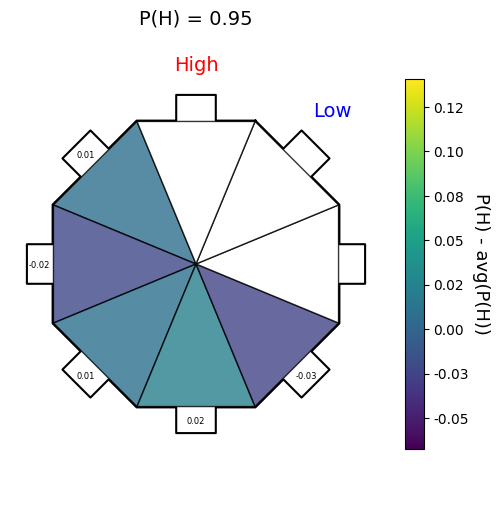

45° wall separation, HW visible first


In [92]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, HW_45_probabilities_solo, all_ratios)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, HW_45_total_counts_by_bin_solo, HW_45_probabilities_solo)

#ax = headangle_analysis_plotting_functions.plot_counts_in_bins(ax, HW_45_total_counts_by_bin_solo, HW_45_true_counts_by_bin_solo)


#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center2_x, alcove_center2_y = alcove_centers[:,1]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center2_x + 3, alcove_center2_y + 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')


#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmax=max(all_ratios), vmin=min(all_ratios)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

# Format the ticks on the color bar to show only 2 decimals
cbar.formatter = ticker.FuncFormatter(lambda x, _: f'{x:.2f}')
cbar.update_ticks()  # Update the ticks to apply the formatting

HW_45_rounded_probability_solo = round(HW_45_overall_probability_solo, 2)
plt.title(f"P(H) = {HW_45_rounded_probability_solo}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("45° wall separation, HW visible first")

(2, 8)


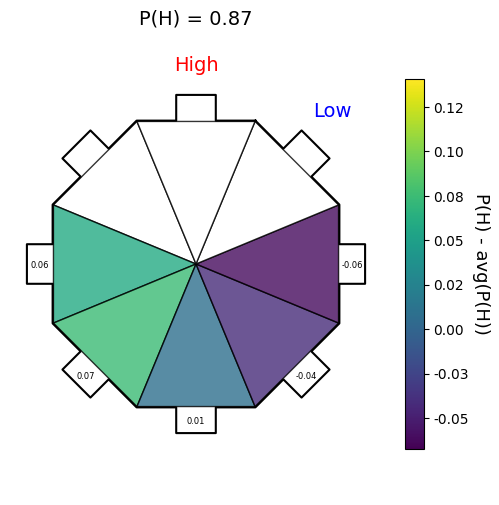

45° wall separation, LW visible first


In [94]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, LW_45_probabilities_solo, all_ratios)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, LW_45_total_counts_by_bin_solo, LW_45_probabilities_solo)

#ax = headangle_analysis_plotting_functions.plot_counts_in_bins(ax, LW_45_total_counts_by_bin_solo, LW_45_true_counts_by_bin_solo)


#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center2_x, alcove_center2_y = alcove_centers[:,1]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center2_x + 3, alcove_center2_y + 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')


#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmax=max(all_ratios), vmin=min(all_ratios)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

# Format the ticks on the color bar to show only 2 decimals
cbar.formatter = ticker.FuncFormatter(lambda x, _: f'{x:.2f}')
cbar.update_ticks()  # Update the ticks to apply the formatting

LW_45_rounded_probability_solo = round(LW_45_overall_probability_solo, 2)
plt.title(f"P(H) = {LW_45_rounded_probability_solo}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("45° wall separation, LW visible first")

(2, 8)


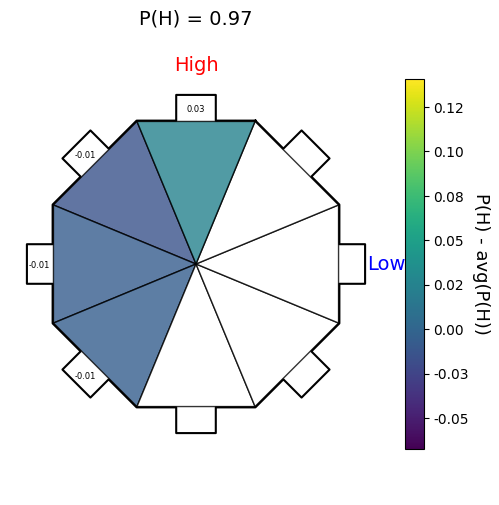

90° wall separation, HW visible first


In [95]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, HW_90_probabilities_solo, all_ratios)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, HW_90_total_counts_by_bin_solo, HW_90_probabilities_solo)

#ax = headangle_analysis_plotting_functions.plot_counts_in_bins(ax, HW_90_total_counts_by_bin_solo, HW_90_true_counts_by_bin_solo)


#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

# Get the center of the third alcove
alcove_center2_x, alcove_center2_y = alcove_centers[:, 2]

# Adjust the position slightly to the right of the third alcove's center
ax.text(alcove_center2_x + 4, alcove_center2_y, f'{"Low"}', 
        ha='center', va='center', fontsize=14, color='Blue')

# Add the high wall label
alcove_center1_x, alcove_center1_y = alcove_centers[:, 0]
ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
        ha='center', va='center', fontsize=14, color='Red')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmax=max(all_ratios), vmin=min(all_ratios)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

# Format the ticks on the color bar to show only 2 decimals
cbar.formatter = ticker.FuncFormatter(lambda x, _: f'{x:.2f}')
cbar.update_ticks()  # Update the ticks to apply the formatting

HW_90_rounded_probability_solo = round(HW_90_overall_probability_solo, 2)
plt.title(f"P(H) = {HW_90_rounded_probability_solo}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("90° wall separation, HW visible first")

(2, 8)


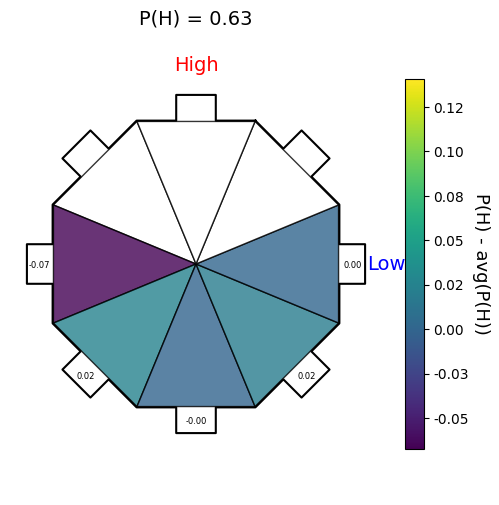

90° wall separation, LW visible first


In [96]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, LW_90_probabilities_solo, all_ratios)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, LW_90_total_counts_by_bin_solo, LW_90_probabilities_solo)

#ax = headangle_analysis_plotting_functions.plot_counts_in_bins(ax, LW_90_total_counts_by_bin_solo, LW_90_true_counts_by_bin_solo)


#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

# Get the center of the third alcove
alcove_center2_x, alcove_center2_y = alcove_centers[:, 2]

# Adjust the position slightly to the right of the third alcove's center
ax.text(alcove_center2_x + 4, alcove_center2_y, f'{"Low"}', 
        ha='center', va='center', fontsize=14, color='Blue')

# Add the high wall label
alcove_center1_x, alcove_center1_y = alcove_centers[:, 0]
ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
        ha='center', va='center', fontsize=14, color='Red')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmax=max(all_ratios), vmin=min(all_ratios)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

# Format the ticks on the color bar to show only 2 decimals
cbar.formatter = ticker.FuncFormatter(lambda x, _: f'{x:.2f}')
cbar.update_ticks()  # Update the ticks to apply the formatting

LW_90_rounded_probability_solo = round(LW_90_overall_probability_solo, 2)
plt.title(f"P(H) = {LW_90_rounded_probability_solo}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("90° wall separation, LW visible first")

(2, 8)


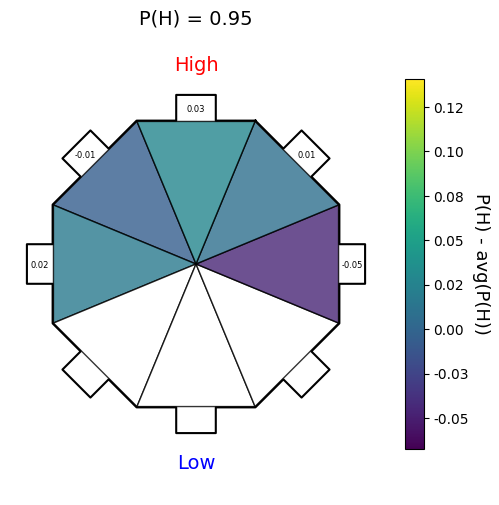

180° wall separation, HW visible first


In [97]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, HW_180_probabilities_solo, all_ratios)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, HW_180_total_counts_by_bin_solo, HW_180_probabilities_solo)

#ax = headangle_analysis_plotting_functions.plot_counts_in_bins(ax, HW_180_total_counts_by_bin_solo, HW_180_true_counts_by_bin_solo)


#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center4_x, alcove_center4_y = alcove_centers[:,4]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center4_x, alcove_center4_y - 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmax=max(all_ratios), vmin=min(all_ratios)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

# Format the ticks on the color bar to show only 2 decimals
cbar.formatter = ticker.FuncFormatter(lambda x, _: f'{x:.2f}')
cbar.update_ticks()  # Update the ticks to apply the formatting

HW_180_rounded_probability_solo = round(HW_180_overall_probability_solo, 2)
plt.title(f"P(H) = {HW_180_rounded_probability_solo}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("180° wall separation, HW visible first")

(2, 8)


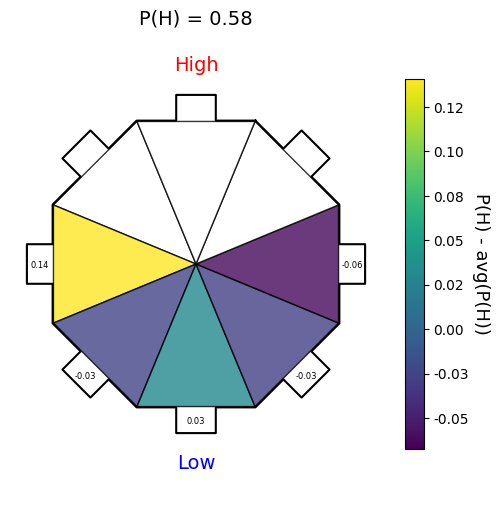

180° wall separation, LW visible first


In [98]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, LW_180_probabilities_solo, all_ratios)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, LW_180_total_counts_by_bin_solo, LW_180_probabilities_solo)

#ax = headangle_analysis_plotting_functions.plot_counts_in_bins(ax, LW_180_total_counts_by_bin_solo, LW_180_true_counts_by_bin_solo)


#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center4_x, alcove_center4_y = alcove_centers[:,4]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center4_x, alcove_center4_y - 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmax=max(all_ratios), vmin=min(all_ratios)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

# Format the ticks on the color bar to show only 2 decimals
cbar.formatter = ticker.FuncFormatter(lambda x, _: f'{x:.2f}')
cbar.update_ticks()  # Update the ticks to apply the formatting

LW_180_rounded_probability_solo = round(LW_180_overall_probability_solo, 2)
plt.title(f"P(H) = {LW_180_rounded_probability_solo}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("180° wall separation, LW visible first")

(2, 8)


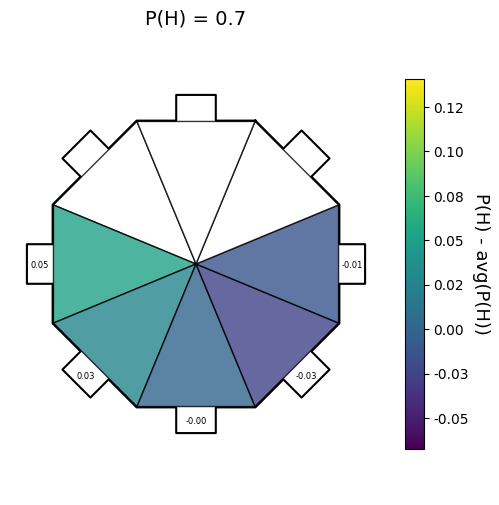

wall separations combined, LW visible first


In [99]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, LW_probabilities_solo, all_ratios)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, LW_total_counts_by_bin_solo, LW_probabilities_solo)

#ax = headangle_analysis_plotting_functions.plot_counts_in_bins(ax, LW_total_counts_by_bin_solo, LW_true_counts_by_bin_solo)


#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmax=max(all_ratios), vmin=min(all_ratios)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

# Format the ticks on the color bar to show only 2 decimals
cbar.formatter = ticker.FuncFormatter(lambda x, _: f'{x:.2f}')
cbar.update_ticks()  # Update the ticks to apply the formatting

LW_rounded_probability_solo = round(LW_overall_probability_solo, 2)
plt.title(f"P(H) = {LW_rounded_probability_solo}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("wall separations combined, LW visible first")

(2, 8)


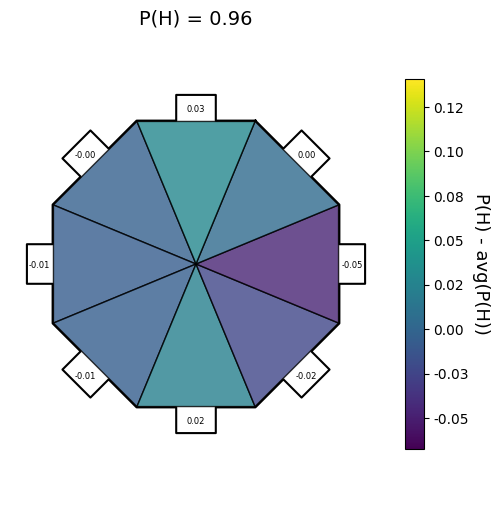

wall separations combined, HW visible first


In [100]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, HW_probabilities_solo, all_ratios)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, HW_total_counts_by_bin_solo, HW_probabilities_solo)

#ax = headangle_analysis_plotting_functions.plot_counts_in_bins(ax, HW_total_counts_by_bin_solo, HW_true_counts_by_bin_solo)


#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmax=max(all_ratios), vmin=min(all_ratios)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

# Format the ticks on the color bar to show only 2 decimals
cbar.formatter = ticker.FuncFormatter(lambda x, _: f'{x:.2f}')
cbar.update_ticks()  # Update the ticks to apply the formatting

HW_rounded_probability_solo = round(HW_overall_probability_solo, 2)
plt.title(f"P(H) = {HW_rounded_probability_solo}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("wall separations combined, HW visible first")